In [128]:
from amplpy import AMPL, Environment

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

from cwSavings import sequential_savings_init

In [129]:
ampl = AMPL(Environment("/Users/itsalfantasy/Documents/ampl_macos64"))

ampl.option['ampl_include'] = 'models'
ampl.option['solver'] = 'cplex'
ampl.read('/Users/itsalfantasy/Documents/ampl_macos64/minimart_project/flp_model.mod')
ampl.readData('/Users/itsalfantasy/Documents/ampl_macos64/minimart_project/minimart-I-50.dat')

ampl.solve()

CPLEX 20.1.0.0: optimal integer solution; objective 65
105 MIP simplex iterations
0 branch-and-bound nodes


In [130]:
n = ampl.getParameter('n').value()
minimart_range = ampl.getParameter('range').value()
Vc = ampl.getParameter('Vc').value()
Fc = ampl.getParameter('Fc').value()
capacity = ampl.getParameter('capacity').value()

Cx = ampl.getParameter('Cx').getValues().toList()
Cy = ampl.getParameter('Cy').getValues().toList()
Dc = ampl.getParameter('Dc').getValues().toList()
installed = ampl.getVariable('installed').getValues().toList()

total_cost = ampl.getObjective('obj').value()

cx_df = pd.DataFrame(Cx)
cy_df = pd.DataFrame(Cy)
dc_df = pd.DataFrame(Dc)
installed_df = pd.DataFrame(installed)

# final form of the dataframe
df = pd.DataFrame(columns=['Cx', 'Cy', 'Dc', 'installed'], dtype=np.float64)
df['Cx'] = cx_df[1]
df['Cy'] = cy_df[1]
df['Dc'] = dc_df[1]
df['installed'] = installed_df[1]


inst_df = df[ df['installed'] == 1 ]

inst_df


,Cx,Cy,Dc,installed
0,9.0,22.0,10.0,1.0
1,22.0,5.0,3.0,1.0
5,2.0,24.0,4.0,1.0
8,15.0,2.0,4.0,1.0
11,34.0,25.0,5.0,1.0
13,46.0,33.0,1.0,1.0
15,28.0,46.0,6.0,1.0
20,33.0,15.0,8.0,1.0
21,5.0,5.0,3.0,1.0
30,29.0,17.0,6.0,1.0


In [131]:
coord_list = list()

for _, row in inst_df.iterrows():
    x_coord = row['Cx']
    y_coord = row['Cy']
    new_point = [ x_coord, y_coord ]
    coord_list.append(new_point)


demand_list = list()
demand_list.append(0)

for index in range(1, len(inst_df.index)):
    demand_list.append(1)


In [132]:
dist = distance_matrix(coord_list, coord_list)

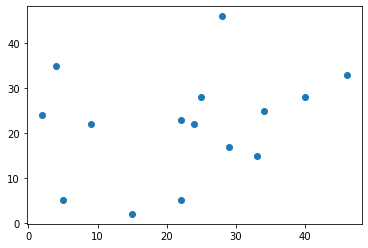

In [133]:
plt.scatter(inst_df['Cx'], inst_df['Cy'])
plt.show()

In [134]:
sol = sequential_savings_init(dist, demand_list, capacity)

In [135]:
total_installation_cost = 0.0

for _, row in inst_df.iterrows():
    total_installation_cost += row['Dc']



total_refurbishment_cost = 0.0

for i in range(1, len(sol)):
    total_refurbishment_cost += dist[sol[i-1], sol[i]] * Vc
    
    if sol[i] == 0:
        total_refurbishment_cost += Fc

cost = total_installation_cost + total_refurbishment_cost



In [136]:
index_list = list()

for elem in inst_df.index:
    index_list.append(elem+1)

print(index_list)

routes_list = list()
for elem in sol:
    routes_list.append(index_list[elem])

print(sol)
print(routes_list)


[1, 2, 6, 9, 12, 14, 16, 21, 22, 31, 35, 37, 38, 40, 43]
[0, 13, 12, 9, 7, 4, 11, 5, 6, 14, 2, 0, 8, 3, 1, 10, 0]
[1, 40, 38, 31, 21, 12, 37, 14, 16, 43, 6, 1, 22, 9, 2, 35, 1]
